Ejercicio: D1
Con los datos del dataset se pretende predecir el precio de los autos FORD usados

Características: 7
Columnas: 8
Usadas: 7

etiquetas: Muchas

ejemplos: 17965

PREPROCESAMIENTO DEL DATASET

In [97]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


PRIMERO SE CARGA EL DATASET PARA SU PROCESAMIENTO

In [109]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/ford - modificado1.csv')

In [110]:
print(df)

        Fiesta  2017  12000  Automatic  15944  Petrol  150  57.7    1
0        Focus  2018  14000     Manual   9083  Petrol  150  57.7  1.0
1        Focus  2017  13000     Manual  12456  Petrol  150  57.7  1.0
2       Fiesta  2019  17500     Manual  10460  Petrol  145  40.3  1.5
3       Fiesta  2019  16500  Automatic   1482  Petrol  145  48.7  1.0
4       Fiesta  2015  10500     Manual  35432  Petrol  145  47.9  1.6
...        ...   ...    ...        ...    ...     ...  ...   ...  ...
17960    B-MAX  2017   8999     Manual  16700  Petrol  150  47.1  1.4
17961    B-MAX  2014   7499     Manual  40700  Petrol   30  57.7  1.0
17962    Focus  2015   9999     Manual   7010  Diesel   20  67.3  1.6
17963       KA  2018   8299     Manual   5007  Petrol  145  57.7  1.2
17964    Focus  2015   8299     Manual   5007  Petrol   22  57.7  1.0

[17965 rows x 9 columns]


SE LLEVA LA COLUMNA DE LOS PRECIOS OSEA DE LAS ETIQUETAS (Y) AL FINAL DEL DATASET

In [111]:
# Posiciones de las columnas que quieres intercambiar
posicion_a = 2
posicion_b = 8

# Intercambio de las columnas
columnas = list(df.columns)
columnas[posicion_a], columnas[posicion_b] = columnas[posicion_b], columnas[posicion_a]
df = df[columnas]

In [112]:
print(df)

        Fiesta  2017    1  Automatic  15944  Petrol  150  57.7  12000
0        Focus  2018  1.0     Manual   9083  Petrol  150  57.7  14000
1        Focus  2017  1.0     Manual  12456  Petrol  150  57.7  13000
2       Fiesta  2019  1.5     Manual  10460  Petrol  145  40.3  17500
3       Fiesta  2019  1.0  Automatic   1482  Petrol  145  48.7  16500
4       Fiesta  2015  1.6     Manual  35432  Petrol  145  47.9  10500
...        ...   ...  ...        ...    ...     ...  ...   ...    ...
17960    B-MAX  2017  1.4     Manual  16700  Petrol  150  47.1   8999
17961    B-MAX  2014  1.0     Manual  40700  Petrol   30  57.7   7499
17962    Focus  2015  1.6     Manual   7010  Diesel   20  67.3   9999
17963       KA  2018  1.2     Manual   5007  Petrol  145  57.7   8299
17964    Focus  2015  1.0     Manual   5007  Petrol   22  57.7   8299

[17965 rows x 9 columns]


SE REEMPLAZA EN LA COLUMNA 3 LOS VALORES DE TEXTO POR VALORES NUMERICOS

In [113]:
df.iloc[:, 3] = df.iloc[:, 3].replace('Manual', 0)
df.iloc[:, 3] = df.iloc[:, 3].replace('Automatic', 1)
df.iloc[:, 3] = df.iloc[:, 3].replace('Semi-Auto', 2)
print(df)

        Fiesta  2017    1 Automatic  15944  Petrol  150  57.7  12000
0        Focus  2018  1.0         0   9083  Petrol  150  57.7  14000
1        Focus  2017  1.0         0  12456  Petrol  150  57.7  13000
2       Fiesta  2019  1.5         0  10460  Petrol  145  40.3  17500
3       Fiesta  2019  1.0         1   1482  Petrol  145  48.7  16500
4       Fiesta  2015  1.6         0  35432  Petrol  145  47.9  10500
...        ...   ...  ...       ...    ...     ...  ...   ...    ...
17960    B-MAX  2017  1.4         0  16700  Petrol  150  47.1   8999
17961    B-MAX  2014  1.0         0  40700  Petrol   30  57.7   7499
17962    Focus  2015  1.6         0   7010  Diesel   20  67.3   9999
17963       KA  2018  1.2         0   5007  Petrol  145  57.7   8299
17964    Focus  2015  1.0         0   5007  Petrol   22  57.7   8299

[17965 rows x 9 columns]


SE REEMPLAZA EN LA COLUMNA 5 LOS VALORES DE TEXTO POR VALORES NUMERICOS

In [114]:
df.iloc[:, 5] = df.iloc[:, 5].replace('Petrol', 0)
df.iloc[:, 5] = df.iloc[:, 5].replace('Diesel', 1)
df.iloc[:, 5] = df.iloc[:, 5].replace('Hybrid', 3)
df.iloc[:, 5] = df.iloc[:, 5].replace('Electric', 4)
print(df)

        Fiesta  2017    1 Automatic  15944 Petrol  150  57.7  12000
0        Focus  2018  1.0         0   9083      0  150  57.7  14000
1        Focus  2017  1.0         0  12456      0  150  57.7  13000
2       Fiesta  2019  1.5         0  10460      0  145  40.3  17500
3       Fiesta  2019  1.0         1   1482      0  145  48.7  16500
4       Fiesta  2015  1.6         0  35432      0  145  47.9  10500
...        ...   ...  ...       ...    ...    ...  ...   ...    ...
17960    B-MAX  2017  1.4         0  16700      0  150  47.1   8999
17961    B-MAX  2014  1.0         0  40700      0   30  57.7   7499
17962    Focus  2015  1.6         0   7010      1   20  67.3   9999
17963       KA  2018  1.2         0   5007      0  145  57.7   8299
17964    Focus  2015  1.0         0   5007      0   22  57.7   8299

[17965 rows x 9 columns]


SE ELIMINA LA PRIMERA COLUMNA DONDE INDICAN LAS MACAS DE LOS AUTOS, SE QUE TAMBIEN INFLIUYE EN EL PRECIOS LOS AUTOS PERO AL INTENTAR USAR PANDAS PARA CAMBIAR LOS VALORES POR UNOS NUMERICOS, NO CAMBIABA NADA, SE MANTENIA TAL COMO ESTBA SE INTENTÓ SE VARIAS MANERAS

In [115]:
df = df.iloc[:, 1:]

In [116]:
print(df)

       2017    1 Automatic  15944 Petrol  150  57.7  12000
0      2018  1.0         0   9083      0  150  57.7  14000
1      2017  1.0         0  12456      0  150  57.7  13000
2      2019  1.5         0  10460      0  145  40.3  17500
3      2019  1.0         1   1482      0  145  48.7  16500
4      2015  1.6         0  35432      0  145  47.9  10500
...     ...  ...       ...    ...    ...  ...   ...    ...
17960  2017  1.4         0  16700      0  150  47.1   8999
17961  2014  1.0         0  40700      0   30  57.7   7499
17962  2015  1.6         0   7010      1   20  67.3   9999
17963  2018  1.2         0   5007      0  145  57.7   8299
17964  2015  1.0         0   5007      0   22  57.7   8299

[17965 rows x 8 columns]


PROCEDEMOS A GUARDAR EL DATASET PREPROCESADO

In [117]:
df.to_csv('/content/drive/MyDrive/Dataset/ford - Modificado 9.csv')

In [118]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [129]:
# Cargar el nuevo conjunto de datos
data = np.loadtxt('/content/drive/MyDrive/Dataset/ford - Modificado 10.csv', delimiter=',')
#data_np = data_np.drop(data_np.columns[0], axis=1)
#data = data_np.to_numpy()


# Extract features and labels from the dataset
X = data[:14372, 1:7]  # Features
y = data[:14372, 8]   # Labels

print(X)
print(y)

# Tamaño del conjunto de datos
m = y.size

# Preprocess for testing (test dataset)
X_test = data[14373:, 1:7]  # Test features
Y_test = data[14373:, 8]   # Test labels

# llama featureNormalize con los datos cargados
#X = featureNormalize(X)
#X_test = featureNormalize(X_test)

# Create a Pandas DataFrame for training data
X_train = pd.DataFrame(X)
y_train =pd.DataFrame(y)
# Size of the dataset
m = y.size

# Number of clusters for K-Means
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)

[[2.0180e+03 1.0000e+00 0.0000e+00 9.0830e+03 0.0000e+00 1.5000e+02]
 [2.0170e+03 1.0000e+00 0.0000e+00 1.2456e+04 0.0000e+00 1.5000e+02]
 [2.0190e+03 1.5000e+00 0.0000e+00 1.0460e+04 0.0000e+00 1.4500e+02]
 ...
 [2.0170e+03 1.0000e+00 0.0000e+00 9.8500e+03 0.0000e+00 1.4500e+02]
 [2.0170e+03 1.1000e+00 0.0000e+00 2.4003e+04 0.0000e+00 1.4500e+02]
 [2.0180e+03 1.0000e+00 0.0000e+00 8.7020e+03 0.0000e+00 1.4500e+02]]
[14000. 13000. 17500. ...  9490.  7990. 12699.]


In [133]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [134]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [135]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X)
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5481998507994356

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

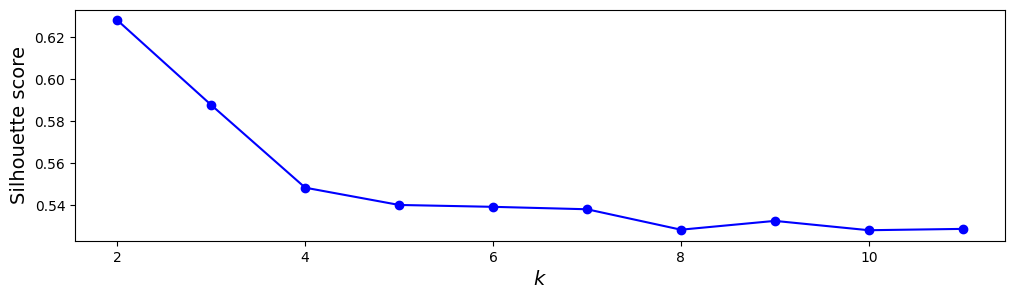

In [136]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 12)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(12, 3))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [142]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

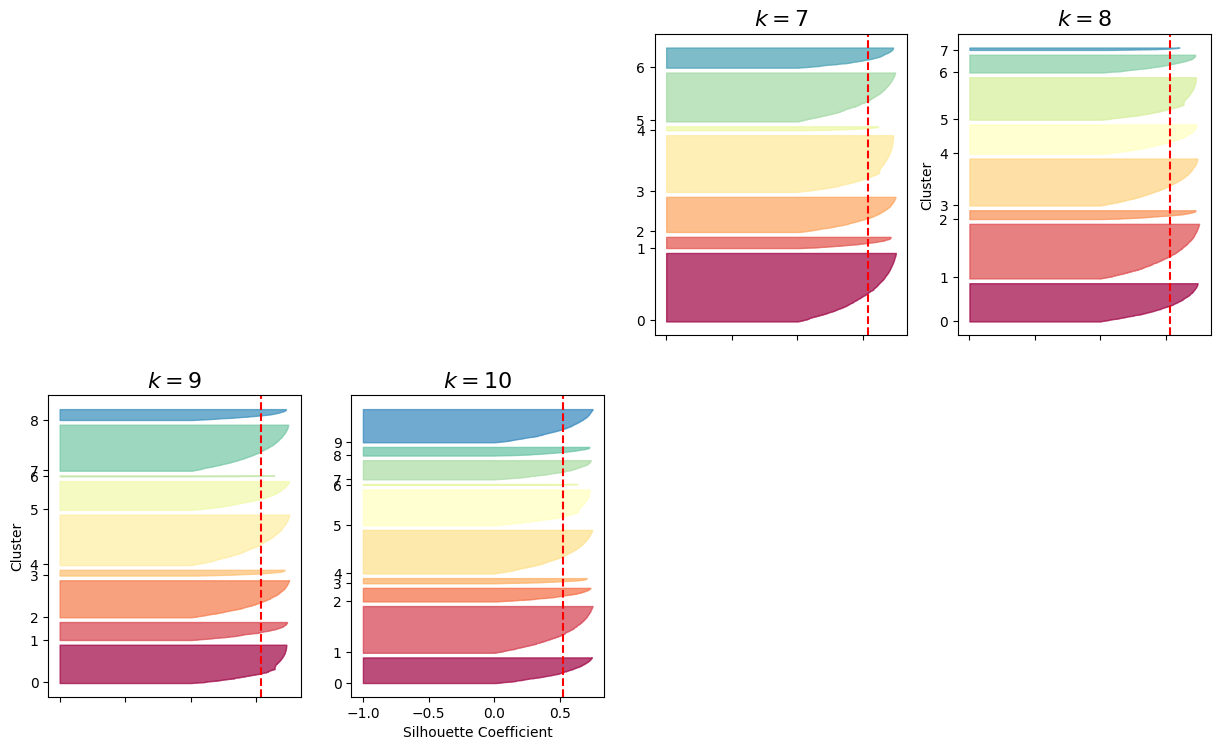

In [145]:
plt.figure(figsize=(15, 18))

for k in (7, 8, 9, 10):
    plt.subplot(4, 4, k )

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 50
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)),  -1,coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 50)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (8, 9):
        plt.ylabel("Cluster")

    if k in (10, 11):
        #plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

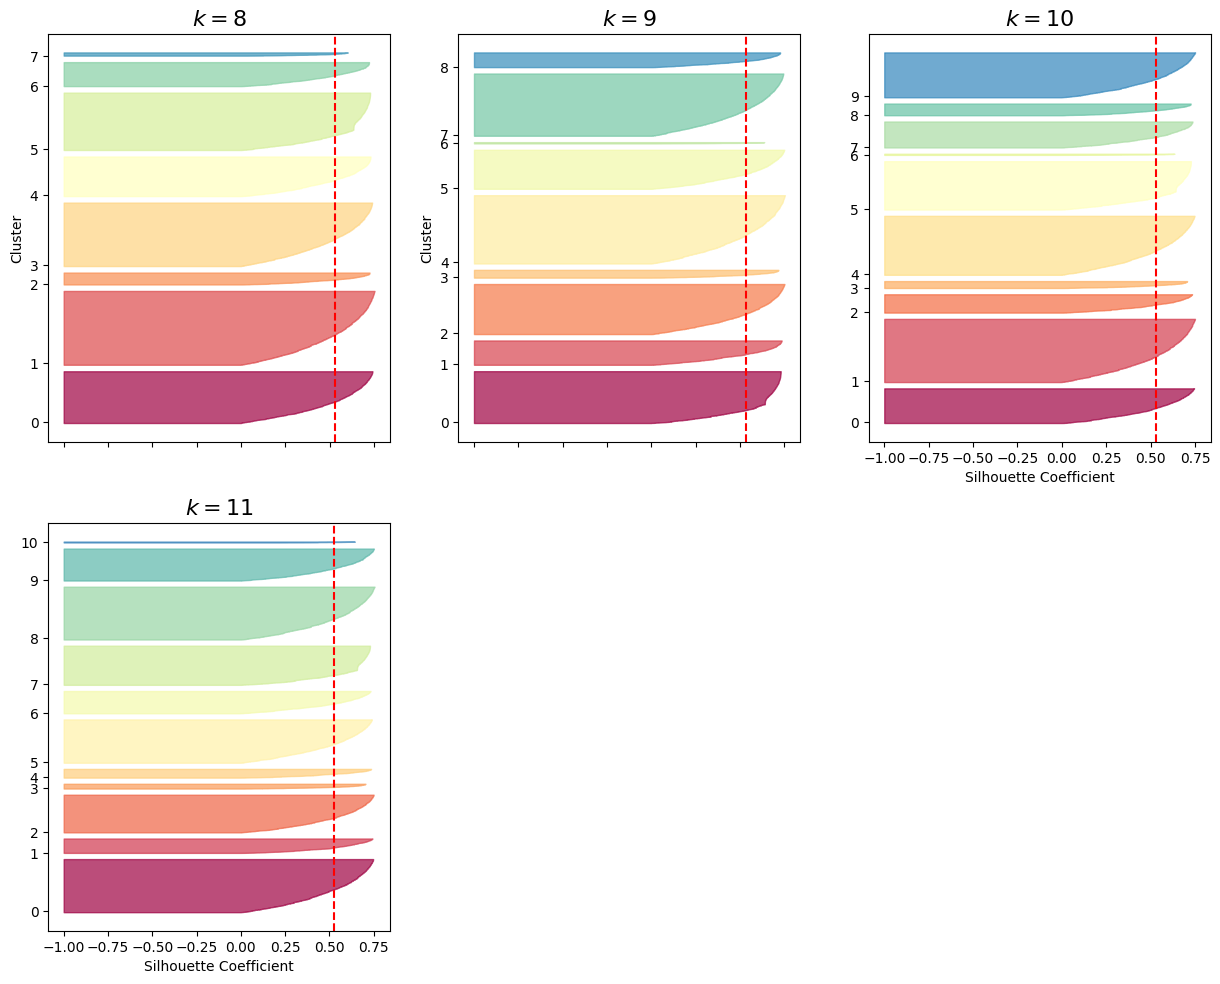

In [146]:
plt.figure(figsize=(15, 18))

for k in (8, 9, 10, 11):
    plt.subplot(3, 3, k-7)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 50
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)),  -1,coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 50)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (8, 9):
        plt.ylabel("Cluster")

    if k in (10, 11):
        #plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

# **K-Means para aprendizaje semi-supervisado.**

Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo los dígitos sin la clase (sólo  X  y no  y ) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de K-Means con, por ejemplos, 50 grupos. De esta manera encontraremos aquellas imágenes más representativas de cada grupo.

In [147]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [152]:
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train.values[idxs]
print(X_representative_digits)

[[2.0180e+03 1.2000e+00 0.0000e+00 1.1534e+04 0.0000e+00 1.4500e+02]
 [2.0170e+03 1.5000e+00 0.0000e+00 3.6677e+04 1.0000e+00 1.2500e+02]
 [2.0130e+03 1.2000e+00 0.0000e+00 6.4256e+04 0.0000e+00 3.0000e+01]
 [2.0150e+03 1.2000e+00 0.0000e+00 2.4860e+04 0.0000e+00 1.2500e+02]
 [2.0180e+03 1.0000e+00 0.0000e+00 5.8290e+03 0.0000e+00 1.4500e+02]
 [2.0140e+03 1.5000e+00 0.0000e+00 4.8462e+04 0.0000e+00 3.0000e+01]
 [2.0130e+03 1.5000e+00 0.0000e+00 7.8000e+04 1.0000e+00 0.0000e+00]
 [2.0170e+03 2.0000e+00 0.0000e+00 1.7493e+04 1.0000e+00 1.4500e+02]
 [2.0170e+03 2.0000e+00 0.0000e+00 3.1926e+04 1.0000e+00 1.4500e+02]
 [2.0120e+03 1.2000e+00 0.0000e+00 9.8000e+04 0.0000e+00 1.2500e+02]
 [2.0170e+03 2.0000e+00 0.0000e+00 2.1827e+04 1.0000e+00 1.2500e+02]
 [2.0160e+03 2.0000e+00 0.0000e+00 4.0438e+04 1.0000e+00 1.2500e+02]
 [2.0190e+03 1.0000e+00 0.0000e+00 9.2230e+03 0.0000e+00 1.4500e+02]
 [2.0190e+03 1.0000e+00 0.0000e+00 1.7140e+03 0.0000e+00 1.4500e+02]
 [2.0180e+03 1.5000e+00 0.0000e+00

El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos trampas ya que disponemos de dichas etiquetas

In [153]:
y_representative_digits = y_train.values[idxs]

Y entrenaremos un clasificados usando estos valores representativos.

In [154]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 365 ms, sys: 4.17 ms, total: 369 ms
Wall time: 386 ms


0.003062360801781737

Usando imagenes aleatorias (no representativas)

In [155]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 358 ms, sys: 138 µs, total: 358 ms
Wall time: 361 ms


0.010579064587973273

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de imágenes. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [156]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [157]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, Y_test)

CPU times: user 645 ms, sys: 84 µs, total: 645 ms
Wall time: 930 ms


0.0022271714922048997

Esto sin embargo empeora nuestro clasificador, incluso usando más muestras de entrenamiento. Esto es debido al ruido que estamos introduciendo, ya que no todas las imágenes estarán bien agrupadas. Para mejorar esto podemos asignar etiquetas a aquellas muestras más cercanas a la imagen más representativa de cada grupo, o aplicar técnicas de aprendizaje activo.

# Aprendizaje Activo

El aprendizaje activo (o Active Learning) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.

In [158]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.05970076, 0.05991057, 0.05996328, 0.05998264, 0.06010955,
       0.06013697, 0.06023245, 0.06024351, 0.0602897 , 0.06049715])

In [163]:
X_lowest = X_train.values[:1000][sorted_ixs[:k]]
print(X_lowest)

[[2.0160e+03 1.5000e+00 0.0000e+00 2.8989e+04 1.0000e+00 3.0000e+01]
 [2.0160e+03 1.2000e+00 0.0000e+00 2.1715e+04 0.0000e+00 1.2500e+02]
 [2.0160e+03 1.2000e+00 0.0000e+00 2.1456e+04 0.0000e+00 1.2500e+02]
 [2.0160e+03 1.2000e+00 0.0000e+00 2.1446e+04 0.0000e+00 1.2500e+02]
 [2.0170e+03 1.5000e+00 0.0000e+00 2.9684e+04 1.0000e+00 3.0000e+01]
 [2.0160e+03 1.2000e+00 0.0000e+00 2.1888e+04 0.0000e+00 1.2500e+02]
 [2.0170e+03 1.5000e+00 0.0000e+00 2.9886e+04 1.0000e+00 3.0000e+01]
 [2.0160e+03 1.5000e+00 0.0000e+00 2.8670e+04 1.0000e+00 3.0000e+01]
 [2.0170e+03 1.2000e+00 0.0000e+00 2.1302e+04 0.0000e+00 1.2500e+02]
 [2.0160e+03 1.0000e+00 0.0000e+00 2.1169e+04 0.0000e+00 1.2500e+02]
 [2.0160e+03 1.5000e+00 0.0000e+00 3.1146e+04 1.0000e+00 3.0000e+01]
 [2.0160e+03 1.2000e+00 0.0000e+00 2.0809e+04 0.0000e+00 1.2500e+02]
 [2.0180e+03 5.0000e+00 0.0000e+00 2.0847e+04 0.0000e+00 1.4500e+02]
 [2.0160e+03 1.2000e+00 0.0000e+00 2.0700e+04 0.0000e+00 1.2500e+02]
 [2.0170e+03 1.0000e+00 0.0000e+00

In [164]:
y_lowest = y_train.values[:1000][sorted_ixs[:k]]
y_lowest

array([[11998.],
       [ 7998.],
       [ 7998.],
       [ 7998.],
       [10498.],
       [ 8498.],
       [10698.],
       [ 8698.],
       [ 8498.],
       [ 9698.],
       [ 7995.],
       [ 7298.],
       [29998.],
       [ 7995.],
       [ 9949.],
       [15995.],
       [ 8498.],
       [ 9998.],
       [ 8998.],
       [10250.],
       [18298.],
       [ 9750.],
       [11995.],
       [ 9330.],
       [ 8998.],
       [18498.],
       [ 9591.],
       [ 7498.],
       [10000.],
       [ 9998.],
       [ 9498.],
       [ 9500.],
       [ 8298.],
       [ 9498.],
       [13998.],
       [19498.],
       [10998.],
       [ 8000.],
       [ 8495.],
       [15998.],
       [12798.],
       [17498.],
       [ 9598.],
       [10998.],
       [13398.],
       [16998.],
       [ 7750.],
       [ 8699.],
       [18998.],
       [12598.]])

In [165]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest[:, 0]

In [166]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, Y_test)

CPU times: user 812 ms, sys: 8.69 ms, total: 821 ms
Wall time: 822 ms


0.0025055679287305124